In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [3]:
comments=["토스... toss...말그대로 돈을 '토스'해주는 계좌이체 서비스를 지향하던 어플 나부랭이였는데 이제 많이컸다고 은행까지 하려하네 ㅎㅎㅎㅎ",
  '작성자에 의해 삭제된 댓글입니다.',
  '기존은행 직원들 곡소리좀 나것어 ㅎㅎ',
  '작성자에 의해 삭제된 댓글입니다.',
  '금리는?',
  '토스는 뭔가 많이 퍼주는느낌이 있어 쓰게되던데',
  '좋은 금리로 소상공인. 소비자를 잡아주세요 응원합니다',
  '토스 부동산 펀드 가입했다가 원금 1년째 못받는중',
  '대단합니다. 응원합니다.',
  '좋아~ 이제 은행은 지점이 필요없다. 인터넷은행 3개사의 시대이다. 제일 삐리리한 케뱅도 가상자산 연계하니까 뜨잖아 ㅋㅋ',
  "대한민국 유일한 핀테크 기업 '토스'!!! 기존 1은행권들 정신이 바짝들게 혁신적인 서비스 많이 제공하길 기대합니다.",
  '양깅체제 에서 새로운 다크호스가 출현 했네요!소비자의 입장에서는 반가운 소식 입니다.다만 금리가 문제이긴 하겠지만요!',
  '토스도 뒷조사 좀 해봐야겠네. 민주당 정부들어 정부에서 엄청 밀어주는데?',
  '토스 크라우딩 펀딩 가입했다가 손해보고 회사들 이자도 안주고 토스는 지네 책임 아니라며 모른척했지? 이런 회사가 무슨 허가 내주지 마라',
  '온리인 점포로 갈련다 이자도 높게 주겠지',
  '그나마 출범 최초창기엔 대출신청에 조금이나마 원활할꺼 같네요...',
  '작성자에 의해 삭제된 댓글입니다.',
  '예금이자 많이 쳐줬으면 좋겠다',
  '아이에스이커머스.... 최저바닥탈출.. 원금회복종목... 풀매집해두시오',
  '금리 후지면 망할거임',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '카뱅은 대출금리는 빨리 올리면서...왜 예금금리는 안 올리는지......나도 카뱅에서 토뱅으로 갈아탈련다..카뱅 실망이야',
  '카뱅보단 토뱅이지',
  '토스 프라임 월3천원? 송금 수수료 무료에 주식수수료 0.0015퍼? 무료 제외하곤 업계 최저 수준...상장 종목 수는 적지만 바로 가입했음 주식하려고',
  '토스뱅크님.. 카뱅 대환 해줄겁니까?',
  '카카오 문어발 꼴 보기 싫어서 토스가 이겼으면 함',
  '카뱅 비자금 좀 쓸랬더니 5% 넘더라 ㅋㅋㅋ 토스 나오면 그리러 간다.',
  '뭐든좋으니 토스가 잘할듯.. 저리 대환좀 많이해주세요!',
  '카뱅 청약은 했었지만 실제 사용은 토스를 더 많이함 토스가 더 편하고 지금 은행 관리가 모두 그리로 되어있음',
  '가계부채 총량제땜에 쉽지 않을듯',
  '토뱅 가즈아~~~!!',
  '카뱅 탈출준비, 연기때마다 금리 왕창 올리는 양아치 카뱅은 안녕~~~~',
  '작성자에 의해 삭제된 댓글입니다.',
  '오픈빨 변동 저금리 선착순하고 나중엔 똑같이 신용 3~4프로따갈듯 금융계가 다올리는데 혼자 저금리기조 유지할순없음',
  '작성자에 의해 삭제된 댓글입니다.',
  '카뱅 물려있는데 배당 나오나요?',
  '1년 후 다시 올리겠지...카뱅에서 케이뱅으로 이제 토뱅으로.....',
  '토스주식 진짜좋음',
  '카뱅은 정부지원 받더니 점점 산으로 가네.......참',
  '클린봇이 부적절한 표현을 감지한 댓글입니다.',
  '다윗과 골리앗!!',
  '가계부채로 몸살을 안고 있다.그런데 또 대출을 증가시켜?예라.',
  '대출 오지게 늘려서 가계빚 을어나면 국가 전체 통화량 팽창하고 결국 거품이 부동산과 주식 금융시장에 끼는데 이제 금리인상 하면 죽어날거다 곡소리나고ㅉ',
  '대면없이 대출은 미친 짓이다. 앞으로 이 나라에서 어떤 일이 벌어질까? 얼굴도 보지 않고 묻지마 대출 누구는 통장이 깡통이 될 수도 있는 거고 누굴 위해 이런 제도가 만들어지나. 미////////친//////것들에 의해서',
  '근데...토스가 돈이있나..? 이거이거 돌려막기하는거아냐...?',
  '2프로면 나쁘진 않은데, 큰 금액을 맡길 정도로 탄탄하진 않잖아',
  '5년전 케뱅과 카뱅도 그랬어. 어차피 시간지나면 금리 떨군다. 케뱅 카뱅 지금 하는거 봐라. 지들도 시중은행이라고 저축은행하고 예금금리 차이 어마어마하게 난다.',
  '저축은행 파킹통장들 망하겄네',
  '초심 끝까지 가길 바란다.',
  '예적금 금리가 2%면 대출금리는 얼마인가?',
  '작성자에 의해 삭제된 댓글입니다.',
  '수시입출입 통장이고 매달 이자들어오면 장난 아닌거 같은데..',
  '정육점도 오픈하고 첫 주는 1+1 한다',
  '손내밀어주는곳엔 밀어줘야된다 가즈아~토쓰',
  '카뱅 긴장',
  '인터넷은행들 고객들 싹 모아서 버블팡 한번에 나라 박살 날거같은데 느낌이 쎄~~~하네',
  '헐~ 요건 좋은데? 이눔의 나라가 금리를 이렇게 떨구니까 은행에 안넣구 자산거품만생기지! 정부야 제발 표의식해서 쓸데없는 돈 풀지 말구 웃돈이라두 줘서 백신좀 사라! 원인을 해결해야지!! 코로나 때문에 알바자리두 구하기 힘들구.!! 넘 짱난다! 이번달은 메디25에서 단기 생동성알바로 100만원으로 버티는데, 담달이 문제다 ㅠ',
  '작성자에 의해 삭제된 댓글입니다.',
  '클린봇이 부적절한 표현을 감지한 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '이런 저성장에 무슨 근거로2%주냐? 금융은 건전성 안정성이 우선인데 머지포인트같은 느낌....',
  '달러나 엔화 사면 1, 2년 안에 20%이상 막을텐데',
  '주담대 돼요?',
  '예대율 괴리율이 높으니 남는장사니 하는거지. 조만간 더올라간다',
  '토스도 조만간 카카오 꼴 날 듯 상장기업이었으면 하한가 맞았을텐데',
  '작성자에 의해 삭제된 댓글입니다.',
  '카카오에서 갈아타야겠다',
  '2프로면 그냥 신규주 공모하는게 더 많이준다 다만 잘골라야된다',
  '저렇게 예금주면 대출금리는 타 은행보다 더 올라갈 수 밖에 없음....대출이 들어와서 예금금리를 예금자에게 지급하는데, 대출 받는 사람들이 금리때문에 타은행 간다. 그럼 결국 예대율이 안좋아지며, 대국민 사기극의 시작이 될수도....',
  "토스뱅크통장은 가입 기간, 예치금액 등 아무 제한 없이 '수시 입출금 통장' 하나에 연 2% 이자를 지급,돈을 예치한 날짜부터 연 2% 이자가 계산돼 매달 지급된다. -> 요거 마음에 드네. ㄴㅏ도 사전신청 해야겠다",
  'ㅎ은행업이 무슨 애들 소꼽장난이냐ᆢ동네 계하는것도 아니고~~',
  '2%높다는 말 나오는 수준이니 디파이가 클 수 밖에…',
  '예적금 하느니 배당주로 가자',
  '작성자에 의해 삭제된 댓글입니다.',
  '예금자보호는 5천까지임',
  '2프로는 아마 100만원까지만 으로 내려갑니다.첨엔 홍보용으로 2프로라고하죠',
  '작성자에 의해 삭제된 댓글입니다.',
  '뭔가 2% 부족해...',
  '은행, 저축은행 다 망하겠다 ㅎ ㅎ',
  '헐 2프로 ㄷㄷ',
  '그래 예금금리 올리는 경쟁들어가자!',
  '수시입출금통장이면 시중은행 0.×프로대 인데 .. 파격적이긴하다',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '대출을 발품팔지 예금을 발품판다는말은 첨들어보네. 시중은행도 다 2프로 줘.',
  '새마을 금고 가면 2.2프로 주더라 ㅋ',
  '머지 포인트 이사가 토스이사아님?? 안한다~~',
  '카뱅 빠이 토스로 갈아탄다 ㅎㅎ',
  '수시 입출금 조건없이 2% 는 대박인데...분명 기간 한시적이겠지만 확실히 대박ㅎ',
  '짱깨자본 카뱅아웃!! 토뱅 응원한다',
  '전월실적조건없이 이거 괜찮네',
  '기존 은행들도 살아남기 힘들겠어, 규제덜한 은행들이 들어서고 있으니',
  '수시입출금이 아무제한없이 2%면 저축은행보다도 좋은거.. 체크카드도 혜택 좋은거 같네요 물론 1월2일 까지니 기간이 길진 않지만 나중에 바뀐 혜택 별로면 안쓰면 되니...',
  '카뱅잘있어라',
  '토스 만쉐이~',
  '카뱅빠이',
  '실적 조건부 없는건 정말 혁신 그자체네요... 저축은행도 못하는데',
  '토스로 갈아타야겠다~',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '토스 갈아타야지~',
  '카뱅도 카드 만드는 수수료 받더라도 쫌 이쁘게좀 만들어라..매우허접해서 들고다니기가 싫다',
  '시장에 그냥 폭탄을 던지는구만~ 기대되네~',
  '카뱅 접어야겠군요.',
  '작성자에 의해 삭제된 댓글입니다.',
  '대박이네',
  '작성자에 의해 삭제된 댓글입니다.',
  '클린봇이 부적절한 표현을 감지한 댓글입니다.',
  'ㅋㅋ노쓸모',
  '그래 너네가가 일단 메기 역할 좀 해라~ 어차피 1년 후에 혜택 줄일건 뻔하지만 ㅎㅎ',
  '카뱅 보다 예금 금리가 좋네',
  '카뱅 이젠 안녕!',
  '작성자에 의해 삭제된 댓글입니다.',
  '확실한 대책이 있는거지? 머지 포인트처럼 뱉어놓고 주워담지 못한는건 아니겠지? 돌려막기처럼? 폰지사기처럼?',
  '글 쓰다만겨? 마지막 마무리 뭥미',
  '카뱅보다 토스지',
  '내가 만든 핸드폰 여러 카테고리 중에 돈에 관련, 토스가 젤 처음에 있음. 토스 젤 편함.',
  '카카오뱅크는 시중은행같이 지점도 없고 인력이 작어서 간접비용에 거의 없는데, 대출이자가 높고 예금이자가 낮아서 순기능을 상실한듯',
  '카뱅 망했네 ㅋㅋ 근데 나는 카카오보다 토스가 낫더라 ㅇㅇ',
  '부동산소액투자 p2p업체처럼 수틀리면 개인들만 피해보니 쳐다도 보지말고 가슈~',
  '인터넷은행들 출시초기에만 반짝 선심성 이벤트 하고 ,나중되면 다 갑질 카카오뱅크 처럼됨. 대출금리 올리고 대출어렵게 만들고~~ 기존 갑질은행들이랑 똑같애짐. 인터넷은행 설립취지와는 무색하게~',
  '평소 공항라운지서비스같은 쓸데없는 카드혜택 많았는데 토스 이거는 버스비 택시비 편의점 그리고 패스트푸드 커피전문점까지..사실상 매일 실질적으로 필요한 혜택들이많다 고객의 니즈를 정확히 읽은점 일단 호평',
  '카뱅,국민에 적금한 돈 모두 토뱅으로 옮뎌야 겠군.^^',
  '올해말까지래',
  '토스톡 너무좋음',
  '예대마진이나 먹는 은행들 긴장해야 할듯 ...',
  '토스에 넣느니 코카콜라 투자하고 연배당3프로를 먹지 ㅋㅋ 토스 뱅크런날 확률이 코카콜라 망할확률보다 높아...',
  '머지포인트 생각나네...',
  '토스가 편하긴함',
  '카뱅사요나라~~토뱅흥해라❤',
  '작성자에 의해 삭제된 댓글입니다.',
  '기존은행 폐점 가즈아~',
  '은행도 사그라지는 시대구만ᆢ금리를 저래 주다 거시기하면ᆢ워쩌',
  '토스',
  '금융실명제 만든 김영삼 옹에게 감사의 묵념 1분씩 하도록',
  '굿 토스 굿',
  '사기꾼아니야',
  '2프로도 마이너스 텅장이다.',
  '연2% 금리면 엄청나네',
  '토스해라',
  '예금 금리실화냐? 대박',
  '토스말고 패스하라 ㅋ',
  "내가 5%로줄께. 나한테 투자해라.진심. 브라질 7%로 넘는다..'일반 통장이..' '세계7위 은행이다.' '",
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '2프로 ㅋㅋㅋ 그냥 미국주식 배당주중 안전빵에 넣는게 훨 좋음',
  '나같아도..ㅋㅋ',
  '작성자에 의해 삭제된 댓글입니다.',
  '어디서 투자하는걸까? ㅋㅋㅋ',
  '예금자 보호는 되냐?',
  '한도가 얼만지 써봐라',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '핀테크니 플랫폼이 얘기하는 소비자 혜택 이런거 100프로 믿으면 안된다. 다 돈벌려고 하는 짓이지 절대 무료봉사 단체가 아니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '다단계 머지 포인트는 아니게쮜!!',
  '카드는 혜택이아니라 결제수수료 뽑아먹겠다는거구만 무슨 혜택이야. 매일 결제해서 저 리워드받을라면 10만원은 더 써야겄드만',
  '일단 쓰게하고 1년뒤 비싸게 갱신.1년안에 갚을놈 별로없지',
  '신형같은 2금융은 2프로 넘은지가 언젠데',
  '90년대엔 국민은행쪽에 20프로짜리도 있었는데...',
  '작성자에 의해 삭제된 댓글입니다.',
  '에휴~ 그지들! 고작 그거 받을려고 목숨을 거냐 이기야? ㅋㅋㅋㅋㅋ',
  '조또 재난지원금 토스통해서 신청 했는데 한참지나 카드사 연락이 않오시면 카드사에직접하래 시간은 지나고 돈은 적지만 몇번다시 확인하고 이게뮈냐구 진작에 카드사로직접할걸 그러면 아무 운제없잔아 토스가 뭐가 필요한지 예들 개인정보나팔아먹는 애들아냐',
  '분명히 알마 못가 혜택을 줄일 것이다. 감독원은 유동성 관리를 해야 한다. 미리 조사해라. 머지포인트 전처를 밟지 않으려면',
  '카카오뱅크가 논란의 중심에 선 지금 토스뱅크 등장이라..타이밍 기가막히게 잘잡네',
  '작성자에 의해 삭제된 댓글입니다.',
  '카뱅 긴장 쫌 혀라~~~첨에 대출 저금리로 꼬셔서 연기때 금리 확 올리는 양아치짓 고마해라. 토스로 고고',
  '카뱅 다음주 하한가 가겠는데?',
  '부디, 카뱅을 이기는 토뱅이 되기를...',
  '난토스로 하루100원 모아서 만보기하고 문제풀이 등 재미있어서 동전모으기 벌써 3만원넘게모았다 좋아토스 그리고 뭘 실수했는지10 만원 보상금도주고',
  '적금보다 이율 쌔면 안할 이유가 없다. 그런데 주거래 은행 버리고 가기엔 찝찝..',
  '네이버 뱅크 안 나오냐 ?? 나오면 갈아탐.',
  '확실히 이렇게 기업간 경쟁이 있어야 소비자 입장에선 좋은법',
  '카뱅도 처음엔 혜택 좋았어 점차 축소된거지',
  '줄때 받으면 되는거지 ㅋㅋ 지속성은 개뿔',
  '허경영강연1290회52:47天使천사完全天使완전천사祝福축복 Level레벨있죠이 레벨만큼 신기한게 없죠?허경영을 만나지 않은 상태에서 아무리 내 이름을 불러도 몸에는 좋은데레벨은 안 올라갑니다.나한테 와서 축복祝福을 받고 천사天使를 받고 그 다음부터 레벨이 올라가죠조상묘가 3000개가 명당이 되고모든 자기가 가진 전화번호부터 100억가지 이상이에너지가 다 들어가고 그렇게 된 다음부터 레벨이 올라가죠?여러분이 축복을 받을 때 백궁에 등록이 됬기 때문에 순식간에일로 에너지가 오죠? 그럼백궁에등록이안된사람은...',
  '카뱅, 떠날 때가 된듯',
  '작성자에 의해 삭제된 댓글입니다.',
  '주거래 계좌로 사용했음에도 불구하고카뱅은 마통도 못만들더군요케이뱅크하니 마통 바로 만듬. 5천 예상했는데 5천이상 ㄷㄷ토스뱅크는 심지어 더 파격적인 행보가 예상되네요물론 지속가능성이 중요하지만카뱅 메리트가 갈수록 없어지고 있는건 확실하네요',
  '카뱅은 그렇게 욕하면서 토뱅은 이렇게 빨아댄다??!!',
  '작성자에 의해 삭제된 댓글입니다.',
  '2022년 1월 2일까지..무제한무료..??? 그 이후는 유료란 야그냐?',
  '전형적인 가입자 부풀리기 수법',
  '카뱅 지금 줄줄~~~~근데 갑자기 머지포인트가 생각난다…',
  '머지머니 꼴 나는거 아냐?',
  '어 또 지나면 더 좋은걸로 꼬실꺼야 지금 안넘어가 ㅎ',
  '맨날 1원2원 주면서 온갖화려한 포장만하는 ㅋ카키오랑 다르네',
  '이제는 여기에 입금해야 겠네..',
  '카카오뱅크도 초반엔 이런식으로 사람 모았지..두고봐야함',
  '어째든 예금자 보호 되는 금액만큼만 넣어도.개이득 ㅋ',
  '작성자에 의해 삭제된 댓글입니다.',
  '은행들 영업이익봐라불가능한 금리아니다은행들이 너거들 쪽쪽빨아먹은겨',
  '작성자에 의해 삭제된 댓글입니다.',
  '더 두고봐야 알겠지만 점포없는 인터넷 은행이라 거래량이 많아진다면 불가능하지만은 않을 듯.부디 좋은 변화를 일으키길.',
  '잘하고있다 토스 ~~~~ 다른은행 얼마나 이자처먹는지.....',
  '“홍민택 토스뱅크 대표는 “소비자가 어떤 상품이 더 나은지 고민할 필요가 없도록 상품을 설계하는 데 초점을 맞췄다”고 말했다.” 결론: 근본 부터 다르다.입출금식 통장 연 2%이자를 감당하는 방법은 아주 간단하다. 다른 기존 은행들 고객들을 전부 뺏어오면 된다.',
  '군더더기 없이 심플하고 깔끔하네. 바로 토스로 옮겨야겠다. 빠이빠이 카뱅.',
  '토뱅으로 갈아탄다!!',
  '시장질서 해치기는 무슨. 예대마진 2%이상 해처먹으면서!!!',
  '월급통장및 공과금은... 가자 토스로...',
  '카뱅을이기길바란다',
  '금리 어차피 더올릴껀데. 다른은행들은 거지같은 금리주는게 말이안됨. 금리는 더올려야해.',
  '좋네요',
  '은행 사상 최대 실적 두고보자',
  '저러면 다른걸 쓸 이유가없지.. 다 토스 쓰겟는데?',
  '5000만원 이하 넣고 개꿀 빨면 됨 예금자 보호 되겠지 뭐',
  '시중은행들 영업이익을 봐라, 어렵긴 개뿔',
  '정말 파격적인 상품이네. ㅎㄷㄷ인터넷 은행.답다. 쩌넹....예.적금 따위 필요없이 그냥 통합시켜 버렸네.대출 이자만 저렴하다면 그냐말로 베스트 오브 베스트 아닌가?',
  '좋다 하...',
  '진짜 알 모으기 개짜증 ㅋㅋㅋ',
  '다른데처럼 첨에만 2% 하구 점점 내려갈거 같긴한데 ㅎㅎ암튼 기대되네요!!',
  'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ우습다 망하는 지름길로 가는구만건전성 관리도 못할 것들이',
  '카카오가 폭주 시작하려던 느낌이었는데 좋은 타이밍이네요. 서로 잘 견제하며 경쟁해줬으면 하네요',
  '작성자에 의해 삭제된 댓글입니다.',
  '토스 수시입출금식 통장',
  '핀테크에서 은행으로 가면서 느끼는 성장통일 듯… 아직 감이 없어서 그럼…은행에서 제일 중요한게…마냥 고객 끌어모으는게 아니라 리스크관리라는걸….핀테크때처럼 내부에 돈 모자르면 누가 투자해주고 그럴줄 착각하는거 안닌가 심히 우려됨.',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '클린봇이 부적절한 표현을 감지한 댓글입니다.',
  '제2의 저축은행 폭망사태 나는건 아닌지...',
  '작성자에 의해 삭제된 댓글입니다.',
  '지들이 감당할수 있다고 큰소리 탕탕 쳤으니까 가능하겠지. 책임도 못질거 저렇게 큰 소리 칠까? 다만 정말로 감당 못하게 되면 뱅크런 사태만 나게 하지 마라. 그 전에 경고 줘서 돈좀 빼줄수 있게만 해줘~',
  '자칫 한방에 훅가는 불상사가 생길수도 ㅎ',
  '내 모든 재산 토스에게~~ 은행들 지들 정부 특권가지고 하는 짓들 이제 못하겠네~~ 대출금리 잣나게 높이고 이자는 그지같이 주고~~',
  'ㄷㄷ..가능한건걸까??저정도 이자면 갈아탄다.',
  '설탕을 뿌려야 개미들 모이지,, 그러고,개미를 잡지 ,,,',
  '기자통장만 술렁',
  '첨엔 다 이래 ㅋㅋ',
  '은행도 통신회사처럼 갈아타기 쉽죠',
  '케이뱅크 보다는 나은듯 전에 사용하다 삭제 했지',
  '지속성보단 초기 노이즈마케팅을 노린 부분 이렇게 기사도 뜨고',
  '작성자에 의해 삭제된 댓글입니다.',
  'ㅋㅋ 좀 오버인듯... 무슨돈으로 흑퍼서 장사하듯....토스 불안하긴 하는데 예금자 보호법 한도에서만 써볼까.. 머지처럼 되는건 아니겠지..',
  '작성자에 의해 삭제된 댓글입니다.',
  '10억으로 공모주하는 것보다, 수시 입출 예금 가입이 낫겠다.',
  '자 카카오도 이제 보여주자',
  '작성자에 의해 삭제된 댓글입니다.',
  '뭘로수익내나? 수상하다......',
  '클린봇이 부적절한 표현을 감지한 댓글입니다.',
  '먹튀는 안 하겠지',
  'ㅇㅋㅂㄹ',
  '몇개월만 주던 어쩌든 일단 옮겨놔야겠네',
  '작성자에 의해 삭제된 댓글입니다.',
  '이러다 한방에간다',
  '2% 준다고 신나서 광고기사에 현옥되는 흑우 없제?',
  '작성자에 의해 삭제된 댓글입니다.',
  '먹튀하려고 ㅋㅋㅋ',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '토스 주식 외국에 나오니 접속 안되어 낭패 봤어요.조심해야 하는 부분들 있을듯.고객센터에 문의해도 지금도 소용없음.ㅠ',
  '카카오,배달의민족,쿠팡 등등 모든 업체들이 초반엔 파격적이었지~ 초대형 기업으로 자리 잡고 나서부턴 고객으로 안본다는게 모든업체들의 공통점이다. 토스? 안정기들어서고 자리잡혀봐~ 언제 그랬냐는듯이 앞면 싹 바꾼다에 내 손모가지를...',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '대신에 저축 은행보다 더 쉽게 망할수있는 리크스가 큰 인터넷 은행 업체겠지. 저 토스뱅크 통장에다 목돈 쌓아두고 있으면 X 되는거다. 제2의 머지포인트 냄새가 난다 각자 알아서 조심해라.',
  '자유입출금 2% 지속 가능하다면 토스가 주거래 은행될듯..',
  '카카오뱅크 망하겠네',
  '우리나라가 선진국 될려면 은행들이 더욱 고객친화적인 서비스 해야된다',
  '캬꺄오 제끼자.',
  '작성자에 의해 삭제된 댓글입니다.',
  '토스 해킹당한거 잊었나요...',
  '이언론사 툭하면 기업띄어주기 부동산투기조장 광고기사만 냅니다 이거 중재위원회 징계감',
  '그냥 저런거 안하고 커피 한두잔 아끼면 그 돈 나온다 ㅋㅋ',
  '2% 금액에 제한이 있겠지? 얼마까지 2% 금리 적용 요로케 한도가 없음 대단한거임',
  '이 금리 돌풍안되면 말되냐?',
  '토스 예전에 해킹당해서 못믿겠음',
  '얼마나 지속되느냐가 관건이네...케이뱅크도 파킹통장 금리 어느날 지들 맘대로 내려버리던데...',
  '토스가 잘하네.',
  '작성자에 의해 삭제된 댓글입니다.',
  '1금융 2금융 기준이 머임??ㅋㅋㅋ',
  '작성자에 의해 삭제된 댓글입니다.',
  '은행 금리 통제좀해라. 예금금리 쥐꼬리. 만큼 주고. 대출금리는 코끼리 몸크기로 뺏어가니까. 앉아서 떼돈버는거다. 갈퀴로 긁어모으는거다. 우린약자라서 그래도 고개를숙인다. 이런신발 이런 시발택시 이런 식빵',
  '구백프로 광고, 사내직원댓글',
  '2%이자를 어떻게 줄수있는거지?',
  '중국이랑 그 어떠한 부분도 엮이지 않고 연결안되어 있다면 안전 할 것이다. 하지만 지금 중국몽 문재인 정권 치하에서의 그림자은행들은 의심을 해야 한다. 합리적 의심이다. 중국자본을 위해 중공 기관에다가 내 개인정보를 팔아넘기는 실수를 하지 말자!',
  '한도 있으면 말장꽝',
  '클린봇이 부적절한 표현을 감지한 댓글입니다.',
  '돈 모은뒤 터트리면 다들 문앞에서 줄서 있을거야~~마이너스면 얼아나 이자물어야하나?',
  '작성자에 의해 삭제된 댓글입니다.',
  '난벌써 카드 5개 신청햇다',
  '대출이자는 4~5퍼대 예금이자는 1퍼대 2퍼준다그래도 남는장사지 토스가 대형은행처럼 지점이퍼져있는것도아니고 개이득',
  '세전ㅋㅋ',
  '하루인출 30만원 한도 계좌?',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '그렇게 반대하다가도. 공짜돈 좀 준다니까. 달려드는거 봐라. 선진국 대열에 들어서는 길목인데. 국민절반이 미개하구나.',
  '규제한다던데',
  '케이뱅크 나 카카오처럼 서민금융으로 가시길 케이뱅크와 카카오는 서민금융은행아니듯 하네 빛도없고 등급도4에서5등급인데 대출불가다 어이상실 직장인인데 마이너스 통장하나 많들기 엄청힘든것이야 여기는 진짜 허탈해서 탈퇴하고싶은 은행 민원접수 했다 케이뱅크 서민금융인지 의심이간다 진짜',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '토스 = 미국 실리콘밸리 자본. 카카오 = 중공 자본.',
  '카뱅 바이바이',
  '카카오 예금이자 너무낮다돈 넣어둘 이유없음 이번에 토스로 가야지',
  '작성자에 의해 삭제된 댓글입니다.',
  '뭐가 나오든 카뱅 과점 막을 상대가 나와야 된다 독점 과점은 반드시 문제가 발생하기 때문에 경쟁 업체가 필수지 요즘 카카오 하는 꼬라지 보면 진짜 정내미 떨어짐',
  '카카오벵크 독점은 끝낫다 이제 전부 토스로 옮긴고있음',
  '양아치 카카오보다 토스를 키워주는게 답이다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '토스뱅크가 나오는 동시 카뱅은 박살날껄?',
  '일단 경쟁은 소비자에게 좋은 것이니 서비스 나오는 거 보고 선택하면 될듯...',
  '수시 입출금 통장 이율이 2%라고 빨리 만들어야겠다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '여러은행 계좌 다쓰고 있는 입장에서 토스편함..60대 엄마갈쳐줘도 지금 잘사용하고있음.',
  '토스라면 잘할거 같다.',
  '토스나 카뱅이나 어차피 1년지나면 이율 똑같아질꺼고 적자때문에 더 빨리 이율이 같아질수도...카뱅은 압도적인 사용자수로 적자를 가장빨리 벗어났고 케이뱅크는 하늘이 도왔는지 코인 열풍때문에 만년적자도 벗어났는데 토스뱅크는 뭘로 적자를 벗어날런지...',
  '카카오처럼 1원 짤짤이로 사람 약올리는 짓은 하지마라',
  '3% 적금 나올듯',
  '클린봇이 부적절한 표현을 감지한 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '우선 싸게 대출받고보자 ㅊㅋ',
  '작성자에 의해 삭제된 댓글입니다.',
  '됬고 이자를 한 10%씩. 줘야 한다. 물가가 너무비싼데 꼴통정부와한국은행놈들은 이십년전 이자율 그대로이고 경제에따라 이자율이 민감하게반응해야하는데 이십년후에는 화폐가치가 종잇조가리에불과할것이다',
  '허경영하늘궁210회 1:37:45박정희 대통령은 내보고 "야 자네는 말이야 내보다 100배가 아주 급해""각하가 하는 거는 아무 것도 아닙니다." "니가 주장한데로 그래 버리면 너무 급한거 아니냐"그러니까 나는 완전 군대식이야 근데 박정희 대통령은 굉장히 온화하고 여성적인 데가 있어 그러면서 뭘 하나 할려면은 담배를 백갑을 피워야 뭘 하나 생각해내',
  '작성자에 의해 삭제된 댓글입니다.',
  '이제 안속지',
  '신불자 압류 몬하게하면 세계최대 인터넷 은행 될끼다 ㅋ',
  '아니 댓글들ㅋㅋㅋㅋㅋ 개웃기네 다 카뱅으로 잃기만 했나카카오만 들어가면 이 악물고 까네보안 다 뚫린적 있던 토스 많이 쓰세요~~~이러나 저러나 mz세대 이용률 1위는 압도적으로 카뱅임ㅎㅎ',
  '기존 은행들 반발이 심하겠군... 적금이자률이 2%대 얼마후 카카오처럼 정부와 금감위에서 제재 들어갈듯~ 기존 기득권 은행들이 봐줄까?ㅋㅋ',
  '토스는 계좌비밀번호도 가르쳐달라고해서 패스',
  '카카오를 이기기에는 역부족~~~이율보다는 접근성에 있어서 카카오가 승리할 뿐...토스가 그런 정책이면 이에 근접한 이율로 카카오가 나서면 게임 끝!!!!!카카오톡의 시장 지배력이 너무 쎄',
  '근데 토스 사람들 많이 쓰나요??주변에 다 카뱅 쓰지 토스 쓰는사람 못봤은데',
  '카카오뱅크나 토스뱅크나 95% 비슷하지 않나 ? 복잡스레 두 곳 가입할 필요가 없다.',
  '토스가 훨씬 편함.카카오는 카카로 플랫폼+이름+캐릭터 믿고 혜택을 많이 주는것 같지만, 실제로는 큰 혜택이 없음.',
  '토스가즈아 ~~ 그담에 걍 토스톡 해서 하나만들어서 카카오톡 잡자',
  '작성자에 의해 삭제된 댓글입니다.',
  '연2프로 계좌 빨리 개설 좀',
  '카카오는 배때기가 불러서 이제안쓴다',
  '카뱅, 처음에 극저리 마통이자로 고객 유치하더니 야금야금 올리더니 지금은 시중은행보다 높음...누굴 호구로 아나...',
  '난 토스가 제일 편하더라 메인은 토스다',
  '토스 한번 써보면 열받아서 카카오 금융앱들 못씀.',
  '기분좋은 소식이네요~ 토스 응원합니다^^*',
  '상장해서 한탕 하려고 작업중이구만. ㅋㅋㅋㅋ',
  '작성자에 의해 삭제된 댓글입니다.',
  '실제론 카카오 혜택이 별로없어. 토스는 다 찾아줘, 혜택을.ㅋㅋ 개편함.',
  '토스 굿',
  '토스는 돈 주잖아. 매일 100원.',
  '작성자에 의해 삭제된 댓글입니다.',
  '토스뱅크 나오면 이제 주은행 갈아탄다~',
  '토스 1년전만해도 별로였는데 요새 너무좋아짐 편하고',
  '카카오계정 엄마껄로 첨에 만들었는데 내폰으로 계정 이동이 안되서 그냥 쓰는중.. 카카오페이, 본인인증 다 안되서 토스가 더 낫다',
  '나도 카카오쓰지만 토스가 이모저모 더 유용한게많은거같다 갈아탈준비중.',
  '밉상 카카오 웃는상 토쓰!',
  '토스 정말 편함',
  '토스 깔끔하고 편하다.',
  '토스 써보니 편하네요~',
  '토스 편하지....너무 편하니 좀 불안하기도 함...ㅎ',
  '다들 불편한 카카오뱅크 쓰지말고 혜택 공짜주는 토스 쓰시오',
  '남의 나라의 신용정보 넘어가는것 보단 울나라꺼 써야지 토스~~~~기즈아~~~',
  '작성자에 의해 삭제된 댓글입니다.',
  '토스 적금 땜시 가입했다가 증권까지 달려보고 증권은 돈 다빼버렸다. 거래가 넘 불편해...',
  '토스가 훨씬편해욤😊고객을위하는느낌',
  '토스야, 토스톡 만들어서 카카오톡 잡아먹자',
  '토스 정말 좋아',
  '카뱅 마이너스 통장 금리인상으로 뒤통수 맞고 토스를 선택했다.',
  '토스 세상편함 카카오 같은건 요기요 할인할때나 사용함',
  '써보면 안다 토스가 얼마나 좋은지~~',
  '둘다 써봣지만 토스 개편함카뱅은 페이니 뭐니 가끔 내돈 얼마있는것도 까먹게되더라',
  'ㄹㅇ이게 맞지 ㅋㅋ',
  '문제는 현실에선 카뱅이라는거 ㅇㅇ. 카뱅없는 사람은 못봤어도 토스 없는사람은 많이봄',
  '카카오 망해라 ㅋㅋ',
  '카뱅 질근질근 밟아줘라카카오는 사실상 사회악',
  '작성자에 의해 삭제된 댓글입니다.',
  '조만간 카카오 토스한테 무너지겠네',
  '토스가 좋긴 함',
  '경쟁은 소비자에게 좋은것...',
  '낚시인가',
  '토스 편한것도 있지만 기능?활용이 많아서 좋음.근데 어플 사용량은 토스주식 영향도 있을거 같은데요.수시로 접속, 매일 접속ㅋ',
  '카카오는 처음에만 쓸만함. 어느정도 가입자 모으면 막 올리기 시작. 혜택도 없어서 이용안한지 오래됨',
  '카카오에.대항하는 토스톡 토스택시.가좌아~~',
  '작성자에 의해 삭제된 댓글입니다.',
  'ㅋㅋㅋㅋ 머지포인트 주 사용층 30대 여성 ㅋㅋㅋ',
  '카카오는 사기 당해도 이체 정지 안시켜 주는 사기꾼 은행임 진짜 사기천지 카카오',
  '토스 나옴 카뱅서 간다',
  '카카오뱅크 대출 이자율이 낮아 자주 사용 했는데 새마을금고보다 이자율 높아서 갈아타야 겠네요.',
  '작성자에 의해 삭제된 댓글입니다.',
  '카카오 마이너스 통장 이용중인데 토스로 갈아탈 방법있나요 ㅜㅜ',
  '카뱅은 배신',
  '사용자 페르소나 분석한다는게 뭔 말이죠?',
  '카뱅은 토스가 있어서 독점에서 자유로와 졌다. 마찬가지다. 카카오모빌리티가 문제라면, 경쟁업체를 더 만들어라. 때려잡아서 없애지 말고...그럼 수수료든 머든 다 해결된다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '짜란다 짜란다 짜란다 토스 화이팅 나는 공산당이 싫어요.',
  '작성자에 의해 삭제된 댓글입니다.',
  '카뱅유저임..토스가 뭐임??',
  '둘다 이용안한',
  '연 이자율 2프로 기대된다',
  '토톡이 나오면 좋겠다.',
  '업비트 월 10시간ㅋㅋㅋㅋㅋㅋ',
  '작성자에 의해 삭제된 댓글입니다.',
  '한화투자증권이랑 하나금융지주 투자 잭팟이네요',
  '작성자에 의해 삭제된 댓글입니다.',
  '토스가 카뱅 못이길텐데',
  '작성자에 의해 삭제된 댓글입니다.',
  '토스 카뱅 가입만 해놓고 둘다 안쓰는 사람이 더 많을껄요.다운로드수는 중복 카운트가 되서 믿으면 안됩니다.실제 가입자는 반도 안됨',
  '토스에서 머지포인트 구매 했다가돈만 날림',
  '뭘 제쳤을까요.. 토스가 카뱅에 비교가 되나요?',
  '토스는 대출같은거때문에 좀 꺼려지게되던데조만간 탈출할계획',
  '얼마 ㅡ나 상납하고 은행 된거냐 ㅡ금액이 궁금하네',
  '토스나 카카오나 수수료 장사하는것들은 사기꾼이다',
  '카카오도 이제 꼭지네...하락만 남았다 ㅋㅋㅋ',
  '토스가 편하긴 함..그렇다고 카뱅은 못이김 ...상장 출시 첫달은 이길수 있어도 장기적으로 거대 플랫폼을 이길순 없음',
  '작성자에 의해 삭제된 댓글입니다.',
  '토스는 이벤트를 많이하면서 돈을 뿌리니...',
  '작성자에 의해 삭제된 댓글입니다.',
  '작성자에 의해 삭제된 댓글입니다.',
  '토스 ㅋ',
  '토스뱅크 관련주 아시는분~~~???',
  '광고성 기사 얼마 받았노?',
  '뻥 치 고 있다ㅡ 너네 ㅡ얼마 상납하고 은행 된거냐',
  '작성자에 의해 삭제된 댓글입니다.',
  '토스발 금융위기 한번올꺼다',
  '앱 내에서 오래 머물러야하는 서비스인게 자랑거리는 아닌듯...',
  '사기꾼 플랫폼회시다',
  '토스는 증권까지 다 하니 그렇죠. 어그로 끄는 기사.',
  '토스 화이팅!!! 카카오 때문에 많이 편해졌지만 선넘는 막무가내 문어발 확장에 등 돌린다. 뭐든 적당히~',
  '토스가...머임?? 토스트나 쳐.ㆍ먹어라~~!! 알바충들아!ㅋ',
  '어디로 토스해야 하냐? 우측? 좌측?',
  '개인정보 ㄷ다 털린데가 ㅡtㅇss엿던가']

In [4]:
while '작성자에 의해 삭제된 댓글입니다.' in comments:
    comments.remove('작성자에 의해 삭제된 댓글입니다.')
while '클린봇이 부적절한 표현을 감지한 댓글입니다.' in comments:
    comments.remove('클린봇이 부적절한 표현을 감지한 댓글입니다.')

In [5]:
print(comments)

["토스... toss...말그대로 돈을 '토스'해주는 계좌이체 서비스를 지향하던 어플 나부랭이였는데 이제 많이컸다고 은행까지 하려하네 ㅎㅎㅎㅎ", '기존은행 직원들 곡소리좀 나것어 ㅎㅎ', '금리는?', '토스는 뭔가 많이 퍼주는느낌이 있어 쓰게되던데', '좋은 금리로 소상공인. 소비자를 잡아주세요 응원합니다', '토스 부동산 펀드 가입했다가 원금 1년째 못받는중', '대단합니다. 응원합니다.', '좋아~ 이제 은행은 지점이 필요없다. 인터넷은행 3개사의 시대이다. 제일 삐리리한 케뱅도 가상자산 연계하니까 뜨잖아 ㅋㅋ', "대한민국 유일한 핀테크 기업 '토스'!!! 기존 1은행권들 정신이 바짝들게 혁신적인 서비스 많이 제공하길 기대합니다.", '양깅체제 에서 새로운 다크호스가 출현 했네요!소비자의 입장에서는 반가운 소식 입니다.다만 금리가 문제이긴 하겠지만요!', '토스도 뒷조사 좀 해봐야겠네. 민주당 정부들어 정부에서 엄청 밀어주는데?', '토스 크라우딩 펀딩 가입했다가 손해보고 회사들 이자도 안주고 토스는 지네 책임 아니라며 모른척했지? 이런 회사가 무슨 허가 내주지 마라', '온리인 점포로 갈련다 이자도 높게 주겠지', '그나마 출범 최초창기엔 대출신청에 조금이나마 원활할꺼 같네요...', '예금이자 많이 쳐줬으면 좋겠다', '아이에스이커머스.... 최저바닥탈출.. 원금회복종목... 풀매집해두시오', '금리 후지면 망할거임', '카뱅은 대출금리는 빨리 올리면서...왜 예금금리는 안 올리는지......나도 카뱅에서 토뱅으로 갈아탈련다..카뱅 실망이야', '카뱅보단 토뱅이지', '토스 프라임 월3천원? 송금 수수료 무료에 주식수수료 0.0015퍼? 무료 제외하곤 업계 최저 수준...상장 종목 수는 적지만 바로 가입했음 주식하려고', '토스뱅크님.. 카뱅 대환 해줄겁니까?', '카카오 문어발 꼴 보기 싫어서 토스가 이겼으면 함', '카뱅 비자금 좀 쓸랬더니 5% 넘더라 ㅋㅋㅋ 토스 나오면 그리러 간다.', '뭐든좋으니 토스가 잘할듯.. 저리 대환좀 많이해주세

In [6]:
len(comments)

334

In [7]:
stopwords = ['을','다','로','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [8]:
from soynlp.noun import LRNounExtractor
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer

noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(comments) # list of str like


word_extractor = WordExtractor(
    min_frequency=10, # example
    min_cohesion_forward=0.05,
    min_right_branching_entropy=0.0
)

word_extractor.train(comments)
words = word_extractor.extract()

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}

noun_scores = {noun:score.score for noun, score in nouns.items()}
combined_scores = {noun:score + cohesion_score.get(noun, 0)
    for noun, score in noun_scores.items()}
combined_scores.update(
    {subword:cohesion for subword, cohesion in cohesion_score.items()
    if not (subword in combined_scores)}
)

tokenizer = LTokenizer(scores=combined_scores)

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (242, 162) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 16 nouns are extracted
training was done. used memory 0.140 Gb
all cohesion probabilities was computed. # words = 45
all branching entropies was computed # words = 412
all accessor variety was computed # words = 412


In [9]:
X_train=[]
for t in comments:
    tokenized = tokenizer.tokenize(str(t))
    stopwords_removed = [token for token in tokenized if not token in stopwords]
    X_train.append(stopwords_removed)
    
X_train

[['토스',
  '...',
  'toss...말그대로',
  '돈을',
  "'토스'해주는",
  '계좌이체',
  '서비스를',
  '지향하던',
  '어플',
  '나부랭이였는데',
  '이제',
  '많이',
  '컸다고',
  '은행',
  '까지',
  '하려하네',
  'ㅎㅎㅎㅎ'],
 ['기존은행', '직원들', '곡소리좀', '나것어', 'ㅎㅎ'],
 ['금리', '는?'],
 ['토스', '뭔가', '많이', '퍼주는느낌이', '있어', '쓰게되던데'],
 ['좋은', '금리', '소상공인.', '소비자', '잡아주세요', '응원합니다'],
 ['토스', '부동산', '펀드', '가입', '했다가', '원금', '1년째', '못받는중'],
 ['대단합니다.', '응원합니다.'],
 ['좋아~',
  '이제',
  '은행',
  '지점이',
  '필요',
  '없다.',
  '인터넷은행',
  '3개사의',
  '시대이다.',
  '제일',
  '삐리리한',
  '케뱅도',
  '가상자산',
  '연계하니까',
  '뜨잖아',
  'ㅋㅋ'],
 ['대한민국',
  '유일한',
  '핀테크',
  '기업',
  "'토스'!!!",
  '기존',
  '1은행권들',
  '정신이',
  '바짝들게',
  '혁신적인',
  '서비스',
  '많이',
  '제공하길',
  '기대합니다.'],
 ['양깅체제',
  '에서',
  '새로운',
  '다크호스가',
  '출현',
  '했네요!소비자의',
  '입장에서는',
  '반가운',
  '소식',
  '입니다.다만',
  '금리',
  '문제이긴',
  '하겠지만요!'],
 ['토스', '뒷조사', '해봐야겠네.', '민주당', '정부들어', '정부에서', '엄청', '밀어주는데?'],
 ['토스',
  '크라우딩',
  '펀딩',
  '가입',
  '했다가',
  '손해보고',
  '회사들',
  '이자',
  '안주고',
  '토스',
  '지네',
  '책임',
  '아니라며',
  '모른척했지?

In [10]:
len(X_train)

334

In [11]:
word_cloud_dict = {}
for words in X_train:
    for w in words:
        if w not in word_cloud_dict.keys():
            word_cloud_dict[w]=1
        else:
            word_cloud_dict[w] += 1
word_cloud_dict

{'토스': 123,
 '...': 2,
 'toss...말그대로': 1,
 '돈을': 2,
 "'토스'해주는": 1,
 '계좌이체': 1,
 '서비스를': 1,
 '지향하던': 1,
 '어플': 2,
 '나부랭이였는데': 1,
 '이제': 12,
 '많이': 13,
 '컸다고': 1,
 '은행': 32,
 '까지': 1,
 '하려하네': 1,
 'ㅎㅎㅎㅎ': 1,
 '기존은행': 2,
 '직원들': 1,
 '곡소리좀': 1,
 '나것어': 1,
 'ㅎㅎ': 3,
 '금리': 28,
 '는?': 1,
 '뭔가': 2,
 '퍼주는느낌이': 1,
 '있어': 2,
 '쓰게되던데': 1,
 '좋은': 12,
 '소상공인.': 1,
 '소비자': 5,
 '잡아주세요': 1,
 '응원합니다': 1,
 '부동산': 1,
 '펀드': 1,
 '가입': 11,
 '했다가': 3,
 '원금': 1,
 '1년째': 1,
 '못받는중': 1,
 '대단합니다.': 1,
 '응원합니다.': 1,
 '좋아~': 1,
 '지점이': 1,
 '필요': 6,
 '없다.': 3,
 '인터넷은행': 2,
 '3개사의': 1,
 '시대이다.': 1,
 '제일': 3,
 '삐리리한': 1,
 '케뱅도': 1,
 '가상자산': 1,
 '연계하니까': 1,
 '뜨잖아': 1,
 'ㅋㅋ': 23,
 '대한민국': 1,
 '유일한': 1,
 '핀테크': 1,
 '기업': 1,
 "'토스'!!!": 1,
 '기존': 6,
 '1은행권들': 1,
 '정신이': 1,
 '바짝들게': 1,
 '혁신적인': 1,
 '서비스': 3,
 '제공하길': 1,
 '기대합니다.': 1,
 '양깅체제': 1,
 '에서': 4,
 '새로운': 1,
 '다크호스가': 1,
 '출현': 1,
 '했네요!소비자의': 1,
 '입장에서는': 1,
 '반가운': 1,
 '소식': 1,
 '입니다.다만': 1,
 '문제이긴': 1,
 '하겠지만요!': 1,
 '뒷조사': 1,
 '해봐야겠네.': 1,
 '민주당': 1,
 '정부들어':

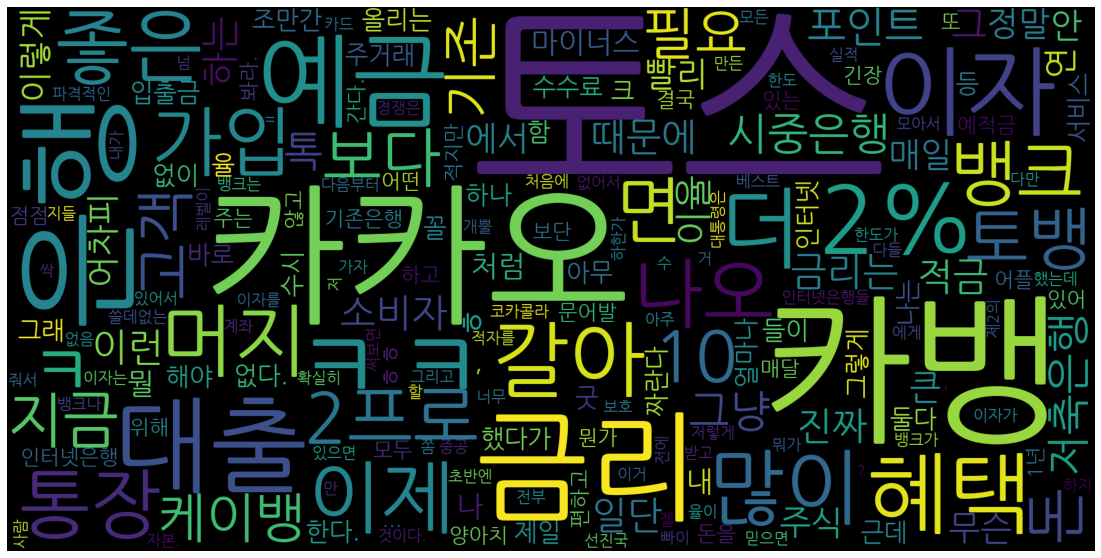

In [17]:
fontpath = './NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'

wordcloud = WordCloud(
    font_path = fontpath,
    width=2000,
    height=1000
).generate_from_frequencies(word_cloud_dict)

file_name = './{}.png'.format("sample word cloud")

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.savefig(file_name, dpi=300)
plt.axis('off')
plt.show()